In [141]:
import numpy as np
import pandas as pd

## Loading the Data

In [142]:
df = pd.read_csv("../predictive_maintenance.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [143]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Target,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [145]:
df.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

In [146]:
df["Type"].value_counts()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

In [147]:
df["Failure Type"].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [148]:

X = df.drop(["UDI","Product ID","Target","Failure Type"],axis=1)
y = df.drop(["UDI","Product ID","Target","Air temperature [K]",	"Process temperature [K]",	"Rotational speed [rpm]",	"Torque [Nm]",	"Tool wear [min]",	"Type"],axis=1)
X = pd.get_dummies(X).astype('int')

y.head()


,Failure Type
0,No Failure
1,No Failure
2,No Failure
3,No Failure
4,No Failure


In [149]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y.max()

c:\Users\BS-Test\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


5

In [150]:
y = pd.DataFrame(y, columns=['Failure Type'])


In [151]:
df = pd.concat([X,y],axis=1)

In [152]:
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M,Failure Type
0,298,308,1551,42,0,0,0,1,1
1,298,308,1408,46,3,0,1,0,1
2,298,308,1498,49,5,0,1,0,1
3,298,308,1433,39,7,0,1,0,1
4,298,308,1408,40,9,0,1,0,1


## Visualizing the Data
Finding correlations between different features

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

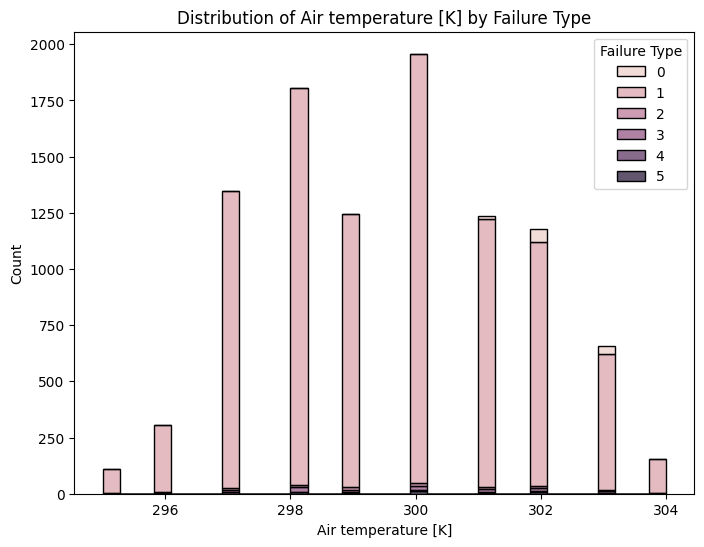

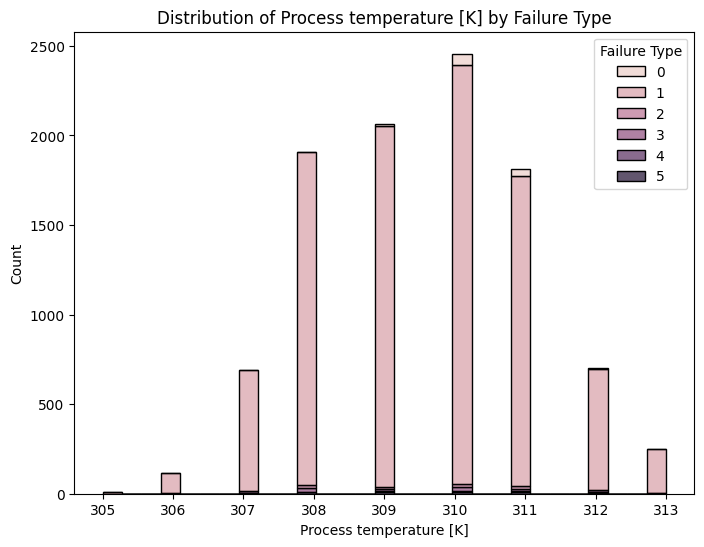

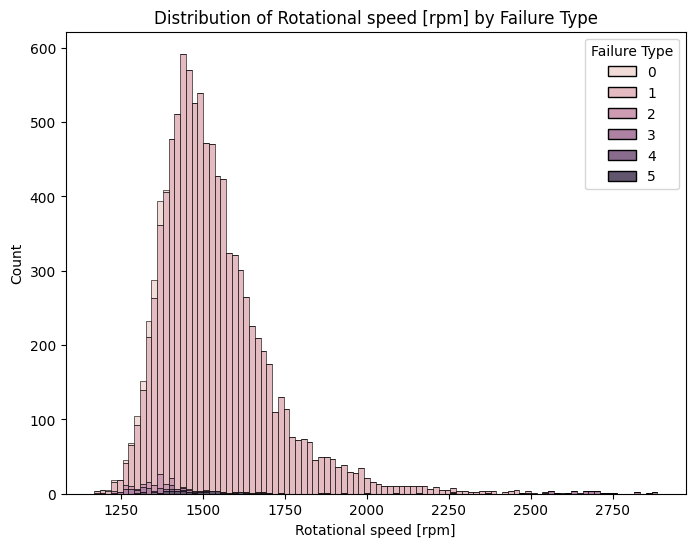

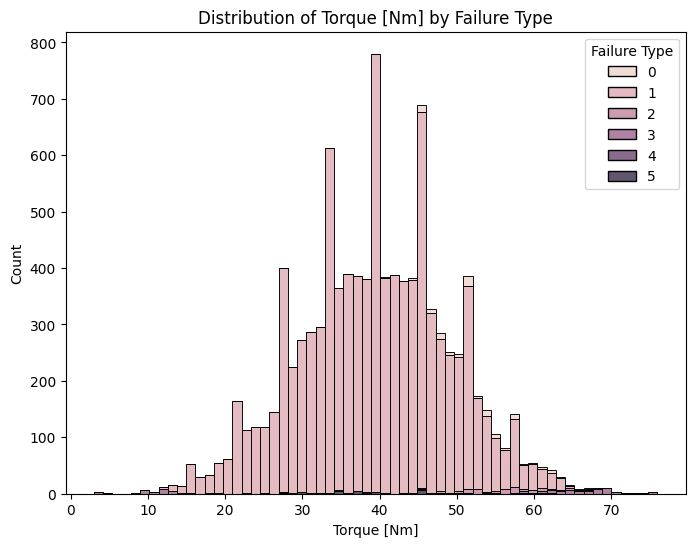

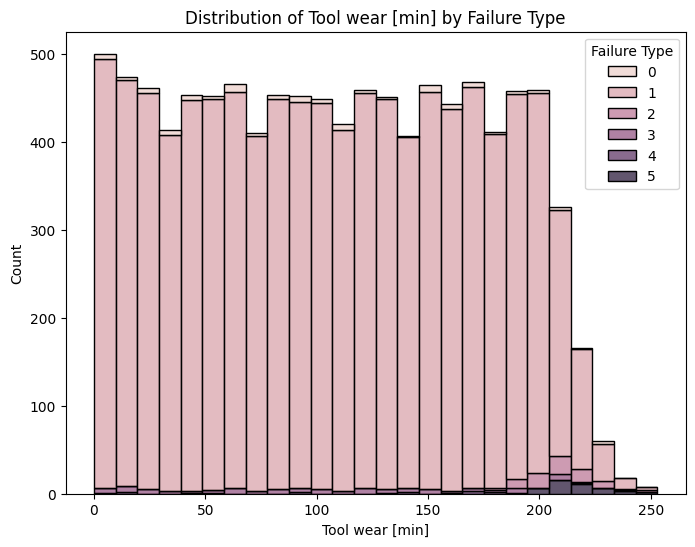

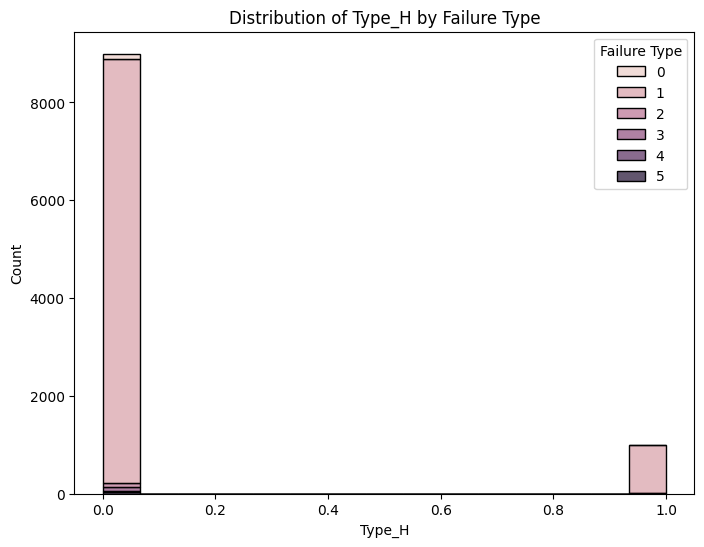

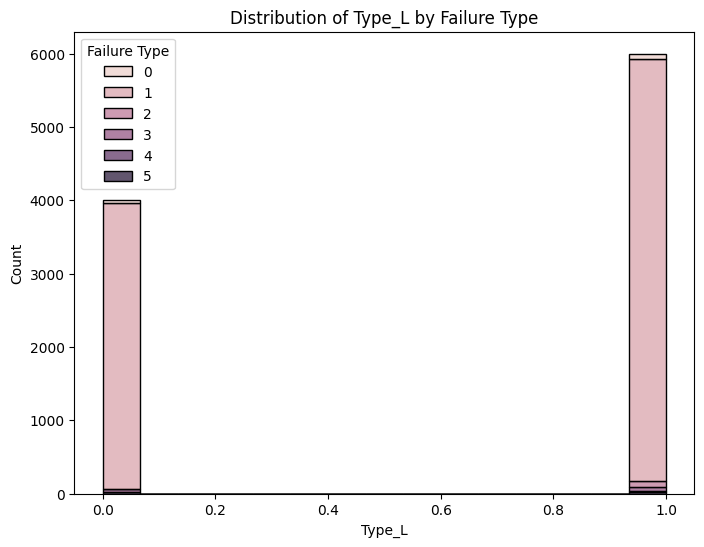

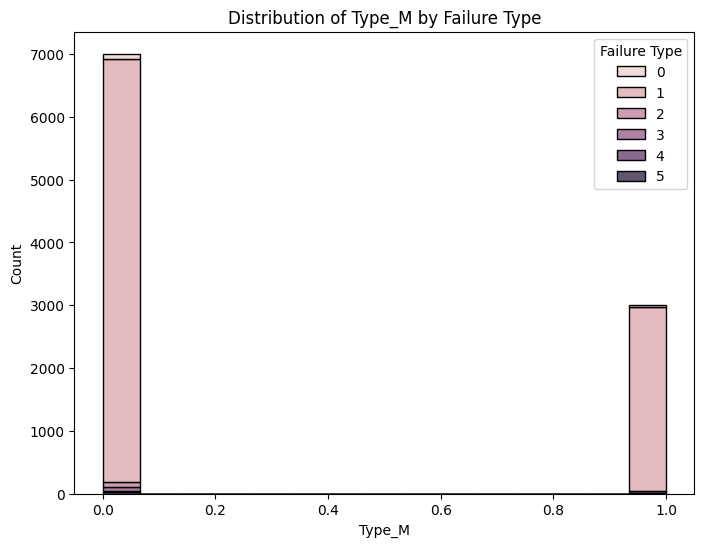

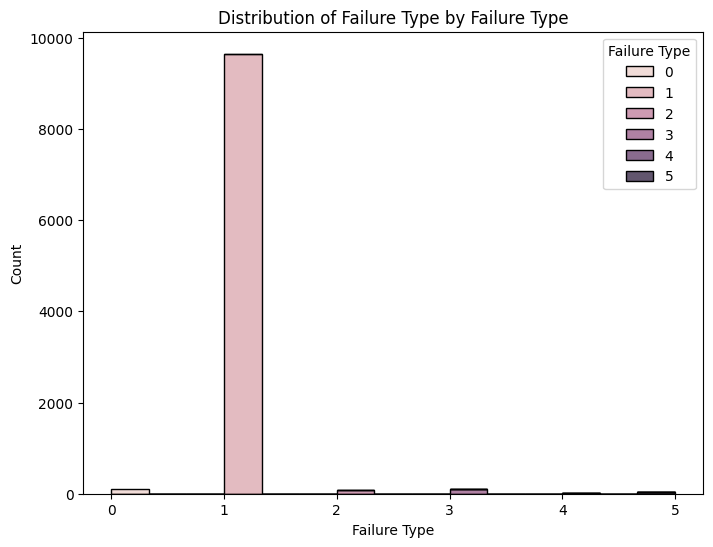

In [154]:
# 3. Histograms (for numerical columns)
numerical_cols = df.select_dtypes(include='number').columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='Failure Type', multiple='stack')
    plt.title(f'Distribution of {col} by Failure Type')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

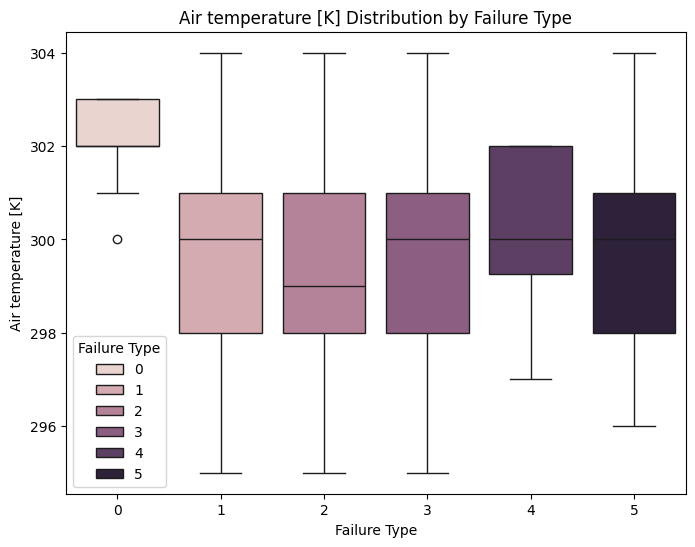

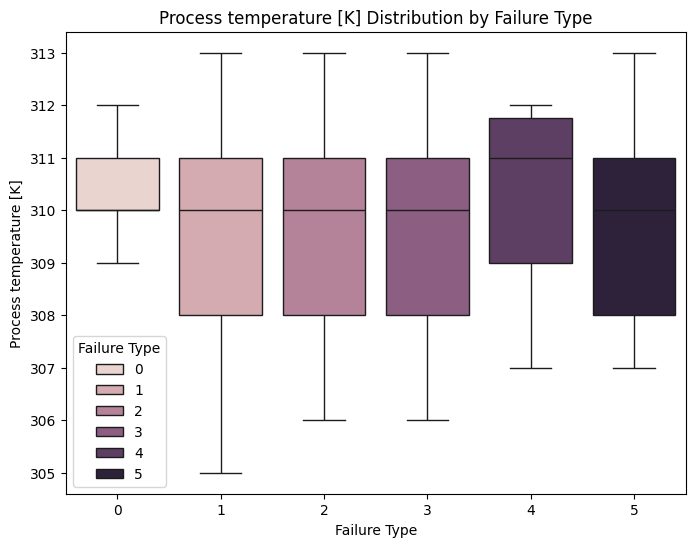

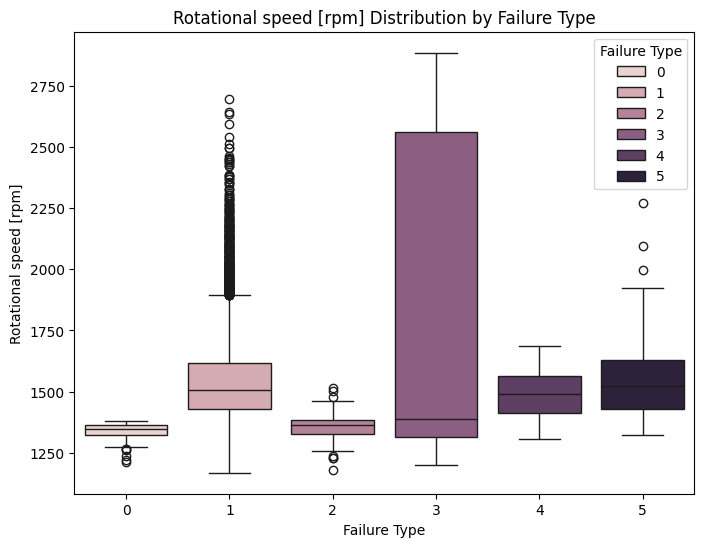

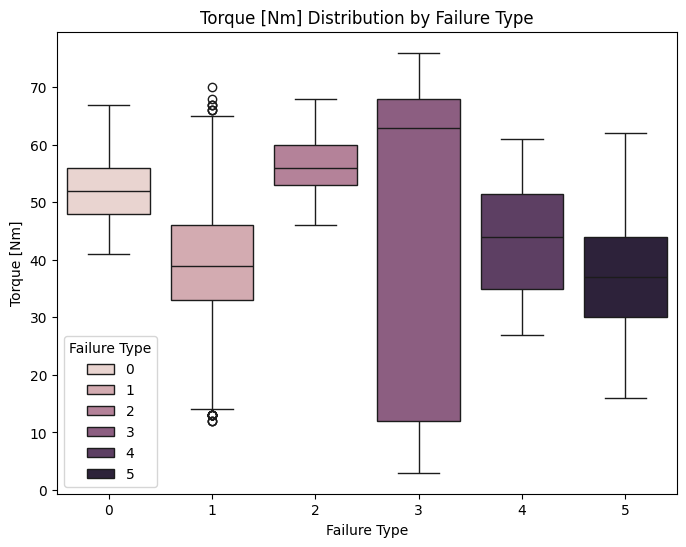

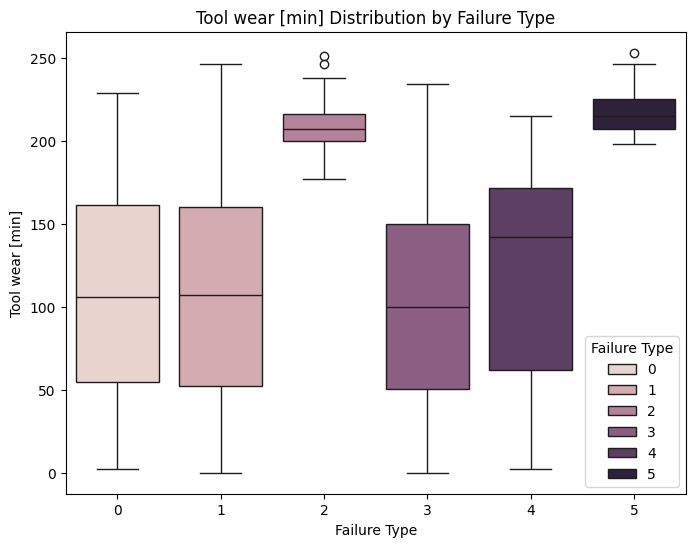

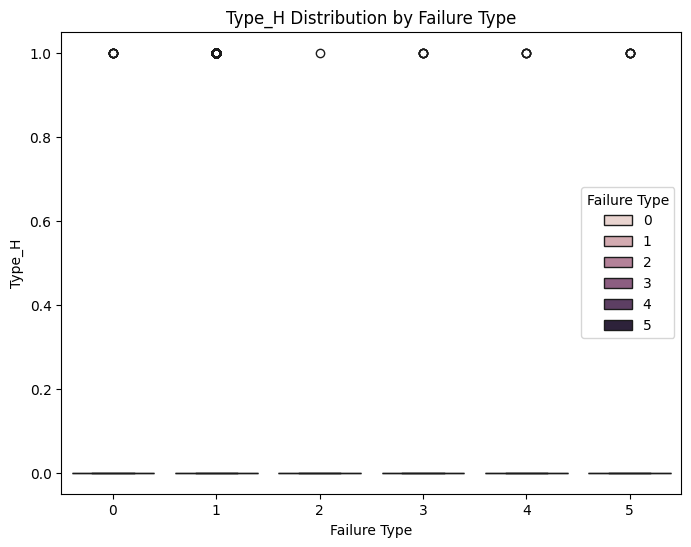

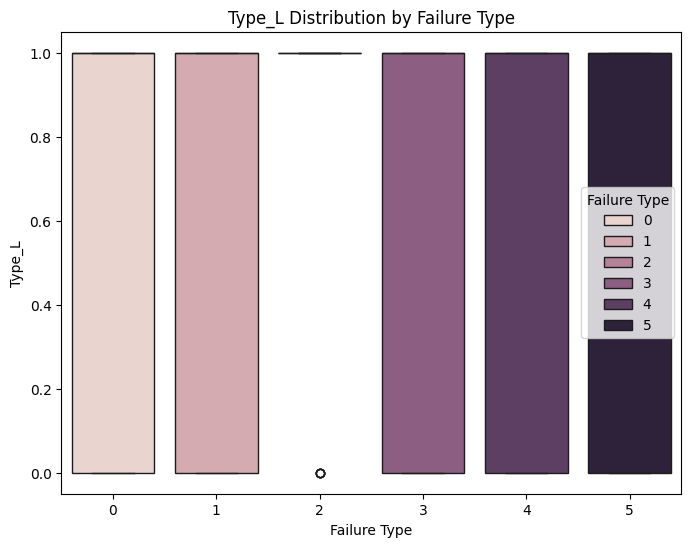

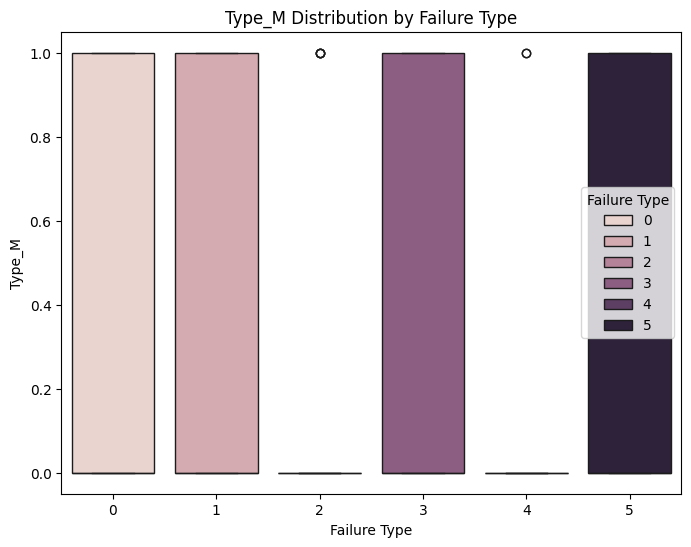

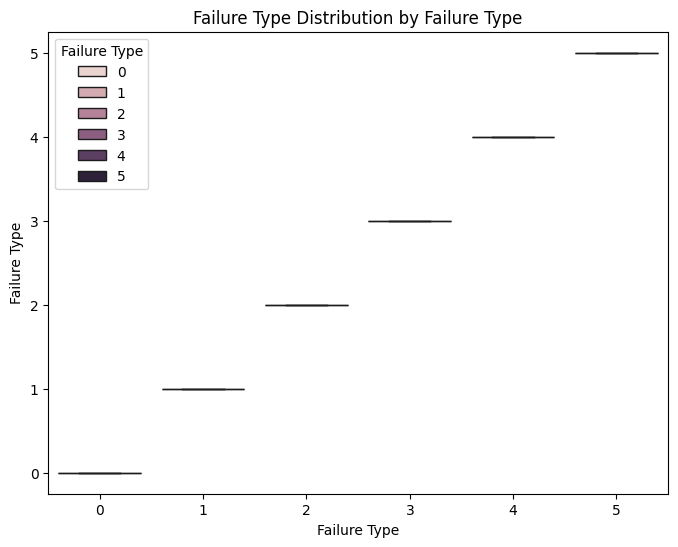

In [155]:
# 4. Box Plots or Violin Plots
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='Failure Type', y=col, hue="Failure Type")
    plt.title(f'{col} Distribution by Failure Type')
    plt.xlabel('Failure Type')
    plt.ylabel(col)
    plt.show()

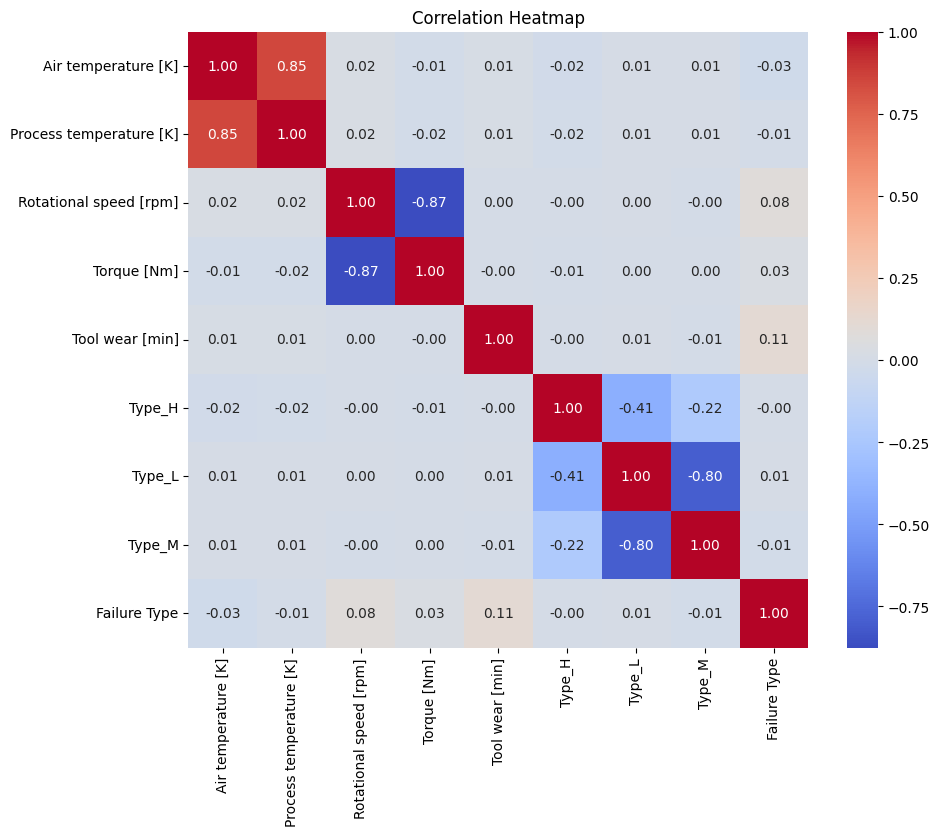

In [156]:
# 5. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [157]:

# 7. Stacked Bar Chart or Grouped Bar Chart (for categorical features)
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='Failure Type')
    plt.title(f'{col} Count by Failure Type')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Failure Type')
    plt.show()

In [158]:
# X = df.drop(["Failure Type"],axis=1)
# y = df['Failure Type']
# X = pd.get_dummies(X).astype('int')
# X

## Saving necessary files for later usage

In [159]:
X_columns = X.columns.to_numpy()
with open("columns.txt",'w') as f:
    f.write(",".join(x for x in X_columns))

In [160]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.33333333, 0.375     , 0.22293364, ..., 0.        , 0.        ,
        1.        ],
       [0.33333333, 0.375     , 0.13969732, ..., 0.        , 1.        ,
        0.        ],
       [0.33333333, 0.375     , 0.19208382, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.44444444, 0.375     , 0.27764843, ..., 0.        , 0.        ,
        1.        ],
       [0.44444444, 0.375     , 0.13969732, ..., 1.        , 0.        ,
        0.        ],
       [0.44444444, 0.375     , 0.19324796, ..., 0.        , 0.        ,
        1.        ]])

In [161]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [162]:
import json
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Save the mapping to a JSON file
with open('label_mapping.json', 'w') as f:
    json.dump(label_mapping, f)

In [163]:
# Convert X and y to pandas DataFrame
X_df = pd.DataFrame(X_scaled, columns=X_columns)
y_df = pd.DataFrame(y, columns=['Failure Type'])

# Concatenate X and y along columns
df = pd.concat([X_df, y_df], axis=1)
df.rename(columns={'Failure Type': 'Target'}, inplace=True)
# Write DataFrame to CSV file
df.to_csv('processed_data.csv', index=False)

In [165]:
y_df.value_counts()

Failure Type
1               9652
0                112
3                 95
2                 78
5                 45
4                 18
Name: count, dtype: int64